In [31]:
import os
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Visual setup
import matplotlib.ticker as ticker
plt.style.use('ggplot')
plt.rc("font", size=14)
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [8, 4]
rcParams['font.size'] = 12
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

#Pandas Options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [2]:
cc1 = pd.read_spss('customer_campaigns.sav')
cc1

,CustID,LDate,YearOfBirth,Gender,CallCenter,EDate,NGroup,Region,Class,AIncome,Response
0,0000002771,2015-11-07,1949.0,Others,No,1.379713e+10,D,South West,Platinum,43.0,No
1,0000004529,2015-06-29,1959.0,Male,No,1.379713e+10,F,London,Silver,41.0,No
2,0000011207,2017-05-23,1966.0,Male,No,1.379713e+10,D,London,Silver,45.0,No
3,0000019763,2016-11-19,1946.0,Female,No,1.379713e+10,B,London,Gold,43.0,No
4,0000046906,2017-11-12,1976.0,Female,Yes,1.379713e+10,F,South West,Silver,47.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1839,0052732018,2013-09-01,1979.0,Female,No,1.379713e+10,E,London,Silver,55.0,No
1840,0052745187,2016-12-02,1973.0,Female,No,1.379713e+10,F,London,Gold,36.0,No
1841,0052758092,2016-04-02,1958.0,Female,No,1.379713e+10,A,South East,Silver,43.0,Yes
1842,0052780250,2011-01-29,1980.0,Male,No,1.379713e+10,F,South West,Silver,38.0,No


By using the pyreadstat library we can transform the categorical variables to numerical values as this was an SPSS file

In [3]:
cc, meta = pyreadstat.read_sav('customer_campaigns.sav')
cc


,CustID,LDate,YearOfBirth,Gender,CallCenter,EDate,NGroup,Region,Class,AIncome,Response
0,0000002771,2015-11-07,1949.0,3.0,0.0,1.379713e+10,4.0,2.0,1.0,43.0,0.0
1,0000004529,2015-06-29,1959.0,2.0,0.0,1.379713e+10,6.0,1.0,3.0,41.0,0.0
2,0000011207,2017-05-23,1966.0,2.0,0.0,1.379713e+10,4.0,1.0,3.0,45.0,0.0
3,0000019763,2016-11-19,1946.0,1.0,0.0,1.379713e+10,2.0,1.0,2.0,43.0,0.0
4,0000046906,2017-11-12,1976.0,1.0,1.0,1.379713e+10,6.0,2.0,3.0,47.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1839,0052732018,2013-09-01,1979.0,1.0,0.0,1.379713e+10,5.0,1.0,3.0,55.0,0.0
1840,0052745187,2016-12-02,1973.0,1.0,0.0,1.379713e+10,6.0,1.0,2.0,36.0,0.0
1841,0052758092,2016-04-02,1958.0,1.0,0.0,1.379713e+10,1.0,4.0,3.0,43.0,1.0
1842,0052780250,2011-01-29,1980.0,2.0,0.0,1.379713e+10,6.0,2.0,3.0,38.0,0.0


Dropping the EDate column as this is the date extracted from the DB

In [4]:
cc.head()

,CustID,LDate,YearOfBirth,Gender,CallCenter,EDate,NGroup,Region,Class,AIncome,Response
0,0000002771,2015-11-07,1949.0,3.0,0.0,1.379713e+10,4.0,2.0,1.0,43.0,0.0
1,0000004529,2015-06-29,1959.0,2.0,0.0,1.379713e+10,6.0,1.0,3.0,41.0,0.0
2,0000011207,2017-05-23,1966.0,2.0,0.0,1.379713e+10,4.0,1.0,3.0,45.0,0.0
3,0000019763,2016-11-19,1946.0,1.0,0.0,1.379713e+10,2.0,1.0,2.0,43.0,0.0
4,0000046906,2017-11-12,1976.0,1.0,1.0,1.379713e+10,6.0,2.0,3.0,47.0,0.0


In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustID       1844 non-null   object 
 1   LDate        1819 non-null   object 
 2   YearOfBirth  1844 non-null   float64
 3   Gender       1844 non-null   float64
 4   CallCenter   1844 non-null   float64
 5   EDate        1844 non-null   float64
 6   NGroup       1844 non-null   float64
 7   Region       1844 non-null   float64
 8   Class        1844 non-null   float64
 9   AIncome      1838 non-null   float64
 10  Response     1844 non-null   float64
dtypes: float64(9), object(2)
memory usage: 158.6+ KB


Noticing the following:
    - LDate and AIncome have missing values
    - LDate needs to be converted into Date
    

In [6]:
cc.isnull().sum()

CustID          0
LDate          25
YearOfBirth     0
Gender          0
CallCenter      0
EDate           0
NGroup          0
Region          0
Class           0
AIncome         6
Response        0
dtype: int64

In [7]:
cc['NGroup'].value_counts()


3.0    406
2.0    338
6.0    332
4.0    331
5.0    231
1.0    153
7.0     53
Name: NGroup, dtype: int64

Looking into the categorical explanations of the NGroup variable. 
This variable represents Neighborhood Groups

In [9]:
cc1['NGroup'].value_counts()

C    406
B    338
F    332
D    331
E    231
A    153
G     53
Name: NGroup, dtype: int64

In [8]:
with pd.option_context('float_format', '{:f}'.format):
    cc1.describe()

,YearOfBirth,EDate,AIncome
count,1844.000000,1844.000000,1838.000000
mean,1966.347072,13797129600.000000,43.328074
std,13.080283,0.000000,6.930370
min,1941.000000,13797129600.000000,12.000000
25%,1956.000000,13797129600.000000,38.000000
50%,1966.000000,13797129600.000000,45.000000
75%,1976.000000,13797129600.000000,49.000000
max,1999.000000,13797129600.000000,59.000000


We can make the assumption that AIncome is in thousands of $$$.


ISSUES:
- LDate has wrong date format
- Missing values in Aincome & LDate
- EDate is unneccessary as this is just the extraction date 

In [9]:
#Dropping the Edate column
cc.drop(['EDate'], axis='columns', inplace=True)

In [10]:
#Converting LDate to datetime

cc['LDate'] = pd.to_datetime(cc['LDate'])

In [11]:
cc.LDate.dtype

dtype('<M8[ns]')

Imputing missing values:
For LDate, we will use the mean and for AIncome median

In [12]:
missing_col = ['LDate']
#Technique 1: Using mean to impute the missing values in the LDate column
for i in missing_col:
 cc.loc[cc.loc[:,i].isnull(),i]=cc.loc[:,i].mean()


In [13]:
cc.isnull().sum()

CustID         0
LDate          0
YearOfBirth    0
Gender         0
CallCenter     0
NGroup         0
Region         0
Class          0
AIncome        6
Response       0
dtype: int64

In [56]:
missing_col1 = ['AIncome']
 
#Technique 2: Using median to impute the missing values for the AIncome column
for i in missing_col1:
 cc.loc[cc.loc[:,i].isnull(),i]=cc.loc[:,i].median()
 
print("count of NULL values after imputation\n")
cc.isnull().sum()

count of NULL values after imputation



CustID         0
LDate          0
YearOfBirth    0
Gender         0
CallCenter     0
NGroup         0
Region         0
Class          0
AIncome        0
Response       0
dtype: int64

Univariate Exploration: Plots 

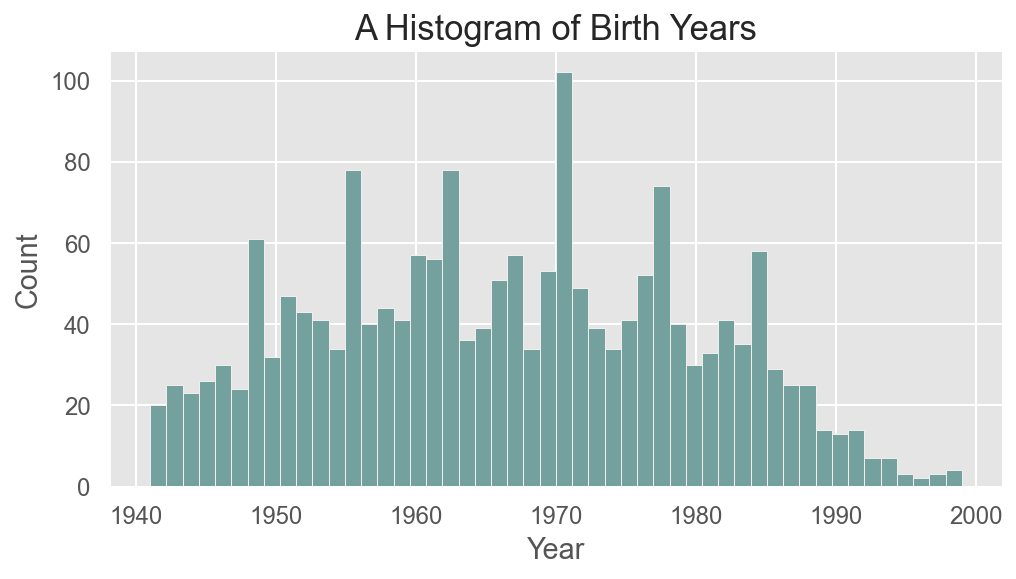

In [57]:
fig, ax = plt.subplots()

# Plot a histogram
ax.hist(cc['YearOfBirth'], bins=50)
# Label
ax.set(title='A Histogram of Birth Years',
       xlabel='Year',
       ylabel='Count')
plt.show();

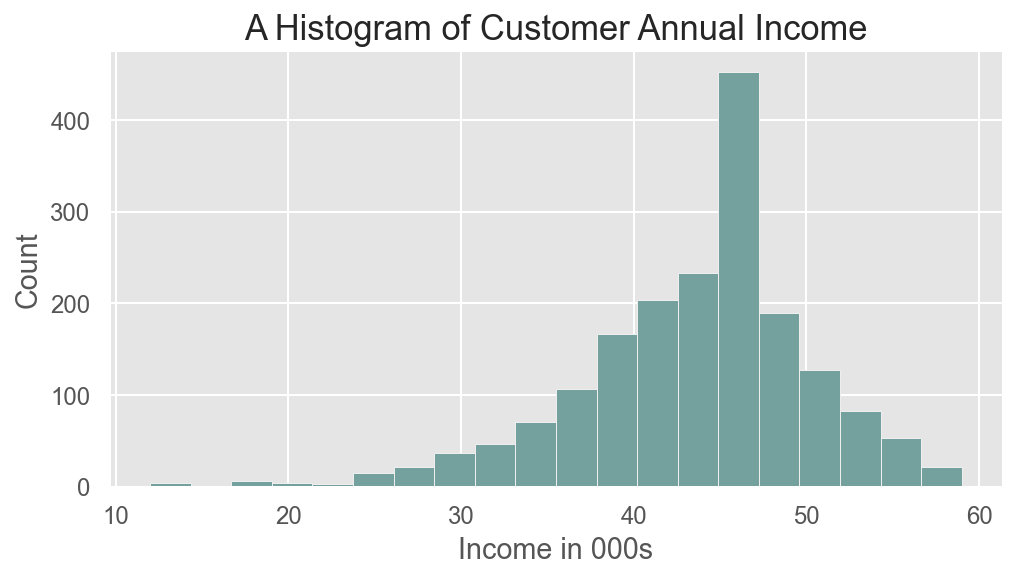

In [58]:
fig, ax = plt.subplots()

# Plot a histogram
ax.hist(cc['AIncome'], bins=20)
# Label
ax.set(title='A Histogram of Customer Annual Income',
       xlabel='Income in 000s',
       ylabel='Count')
plt.show();

Examining the  distribution of different neighborhood groups

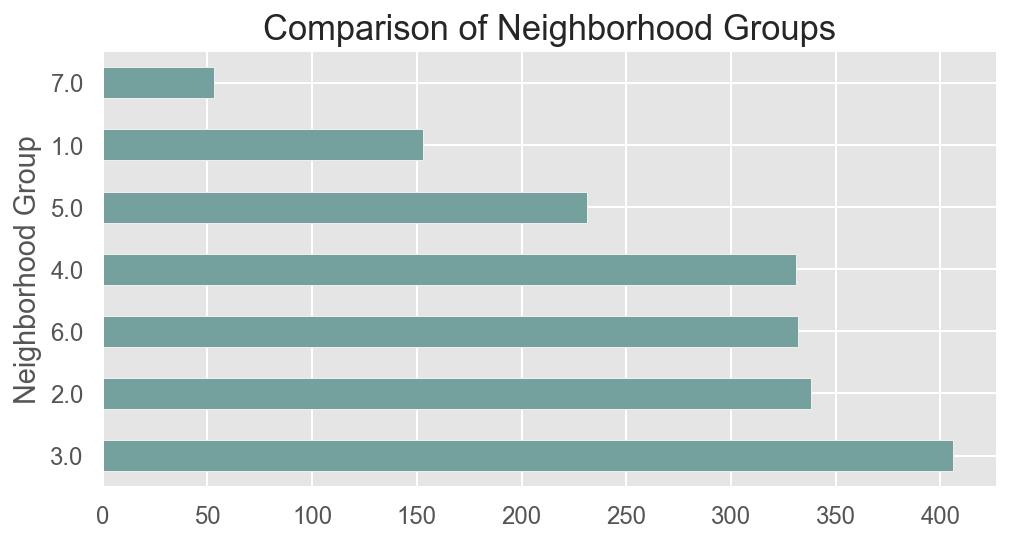

In [59]:
ax = cc.NGroup.value_counts().plot.barh()

ax.set(title='Comparison of Neighborhood Groups',
       ylabel='Neighborhood Group')

plt.show();

Importing the second data set, Transactions

In [60]:
txns = pd.read_spss('Transactions.sav')
txns

,CustID,TranDate,Amount,Web,Store
0,0000075469,2019-05-06 13:32:00,52.82,Yes,No
1,0000075469,2019-05-12 13:43:00,52.17,Yes,No
2,0000075469,2019-11-04 13:43:00,42.63,Yes,No
3,0000075469,2018-01-12 15:37:00,41.79,Yes,No
4,0000075469,2019-12-08 12:37:00,30.94,Yes,No
...,...,...,...,...,...
5815,0052732018,2019-04-05 12:32:00,11.45,Yes,No
5816,0052745187,2019-05-09 12:00:00,204.58,No,Yes
5817,0052745187,2019-05-06 14:06:00,159.83,No,Yes
5818,0052745187,2018-12-12 11:17:00,94.43,Yes,No


This dataset has over 5,000 rows. Indicating that a single customer made multiple transactions

In [61]:
txn, meta = pyreadstat.read_sav('Transactions.sav')
txn

,CustID,TranDate,Amount,Web,Store
0,0000075469,2019-05-06 13:32:00,52.82,1.0,0.0
1,0000075469,2019-05-12 13:43:00,52.17,1.0,0.0
2,0000075469,2019-11-04 13:43:00,42.63,1.0,0.0
3,0000075469,2018-01-12 15:37:00,41.79,1.0,0.0
4,0000075469,2019-12-08 12:37:00,30.94,1.0,0.0
...,...,...,...,...,...
5815,0052732018,2019-04-05 12:32:00,11.45,1.0,0.0
5816,0052745187,2019-05-09 12:00:00,204.58,0.0,1.0
5817,0052745187,2019-05-06 14:06:00,159.83,0.0,1.0
5818,0052745187,2018-12-12 11:17:00,94.43,1.0,0.0


In [62]:
txn.isnull().sum()

CustID      0
TranDate    0
Amount      0
Web         0
Store       0
dtype: int64

In [20]:
txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CustID    5820 non-null   object        
 1   TranDate  5820 non-null   datetime64[ns]
 2   Amount    5820 non-null   float64       
 3   Web       5820 non-null   float64       
 4   Store     5820 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 227.5+ KB


In [63]:
with pd.option_context('float_format', '{:f}'.format):
    txn.describe()

,Amount,Web,Store
count,5820.000000,5820.000000,5820.000000
mean,66.054615,0.364777,0.635223
std,168.464304,0.481409,0.481409
min,1.010000,0.000000,0.000000
25%,12.500000,0.000000,0.000000
50%,37.360000,0.000000,1.000000
75%,77.707500,1.000000,1.000000
max,5081.980000,1.000000,1.000000


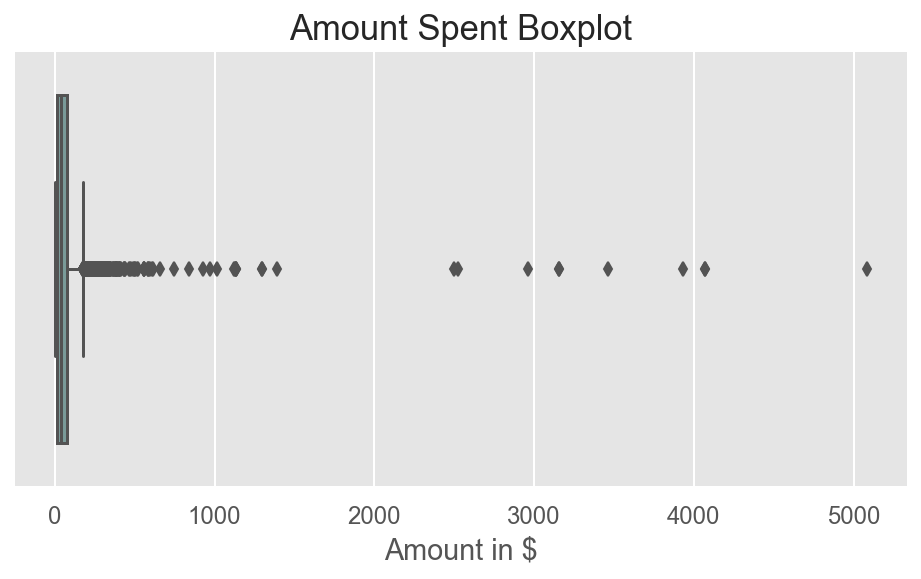

In [64]:
fig, ax = plt.subplots()

# Create a boxplot
sns.boxplot(x = 'Amount', data= txn,
           palette=['#74a09e','#f2a553'])

# Labelling
ax.set(title='Amount Spent Boxplot',
       xlabel='Amount in $')


plt.show();

Some outliers detected, however the common practice is not to impute them. Rather, we acknowledge them and move on.

Next, the two datasets will have to be joined. Process:

    1. The transaction dataset will be grouped into one row per customer with the following columns:
        - ID, LatestTransactionDate, TotalAmountSpent, NoOfWebTxns, NoOfStoreTxns, TotalTxns
    2. Join the two datasets on CustomerId

In [65]:
txn_grpd = txn.groupby(by=["CustID"]).sum()
txn_grpd

,Amount,Web,Store
CustID,,,
0000002771,678.33,4.0,3.0
0000004529,417.95,1.0,2.0
0000011207,33.05,1.0,0.0
0000019763,2.65,0.0,1.0
0000046906,83.75,1.0,0.0
...,...,...,...
0052732018,435.15,2.0,3.0
0052745187,458.84,1.0,2.0
0052758092,885.18,10.0,1.0


In [66]:
txn_grpd["TotalTxn"] = txn_grpd["Web"] + txn_grpd["Store"]


In [67]:
txn_date = txn[['CustID', 'TranDate']]
txn_date = txn_date.groupby(by = ['CustID']).max()
txn_date

,TranDate
CustID,
0000002771,2019-08-11 12:32:00
0000004529,2019-07-10 15:45:00
0000011207,2019-12-09 09:03:00
0000019763,2019-07-07 10:20:00
0000046906,2019-05-10 13:58:00
...,...
0052732018,2019-06-11 11:44:00
0052745187,2019-05-09 12:00:00
0052758092,2019-09-11 15:17:00


In [68]:
txn_full = pd.merge(txn_grpd, txn_date, on = 'CustID')
txn_full.rename(columns = {"TranDate": "LatestTxn", "Amount" : "TotalAmount"}, inplace = True)
txn_full = pd.DataFrame(txn_full)
txn_full


,TotalAmount,Web,Store,TotalTxn,LatestTxn
CustID,,,,,
0000002771,678.33,4.0,3.0,7.0,2019-08-11 12:32:00
0000004529,417.95,1.0,2.0,3.0,2019-07-10 15:45:00
0000011207,33.05,1.0,0.0,1.0,2019-12-09 09:03:00
0000019763,2.65,0.0,1.0,1.0,2019-07-07 10:20:00
0000046906,83.75,1.0,0.0,1.0,2019-05-10 13:58:00
...,...,...,...,...,...
0052732018,435.15,2.0,3.0,5.0,2019-06-11 11:44:00
0052745187,458.84,1.0,2.0,3.0,2019-05-09 12:00:00
0052758092,885.18,10.0,1.0,11.0,2019-09-11 15:17:00


In [69]:
df = pd.merge(cc, txn_full, on = 'CustID')
df

,CustID,LDate,YearOfBirth,Gender,CallCenter,NGroup,Region,Class,AIncome,Response,TotalAmount,Web,Store,TotalTxn,LatestTxn
0,0000002771,2015-11-07,1949.0,3.0,0.0,4.0,2.0,1.0,43.0,0.0,678.33,4.0,3.0,7.0,2019-08-11 12:32:00
1,0000004529,2015-06-29,1959.0,2.0,0.0,6.0,1.0,3.0,41.0,0.0,417.95,1.0,2.0,3.0,2019-07-10 15:45:00
2,0000011207,2017-05-23,1966.0,2.0,0.0,4.0,1.0,3.0,45.0,0.0,33.05,1.0,0.0,1.0,2019-12-09 09:03:00
3,0000019763,2016-11-19,1946.0,1.0,0.0,2.0,1.0,2.0,43.0,0.0,2.65,0.0,1.0,1.0,2019-07-07 10:20:00
4,0000046906,2017-11-12,1976.0,1.0,1.0,6.0,2.0,3.0,47.0,0.0,83.75,1.0,0.0,1.0,2019-05-10 13:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,0052732018,2013-09-01,1979.0,1.0,0.0,5.0,1.0,3.0,55.0,0.0,435.15,2.0,3.0,5.0,2019-06-11 11:44:00
1840,0052745187,2016-12-02,1973.0,1.0,0.0,6.0,1.0,2.0,36.0,0.0,458.84,1.0,2.0,3.0,2019-05-09 12:00:00
1841,0052758092,2016-04-02,1958.0,1.0,0.0,1.0,4.0,3.0,43.0,1.0,885.18,10.0,1.0,11.0,2019-09-11 15:17:00
1842,0052780250,2011-01-29,1980.0,2.0,0.0,6.0,2.0,3.0,38.0,0.0,163.36,0.0,1.0,1.0,2019-06-12 09:56:00


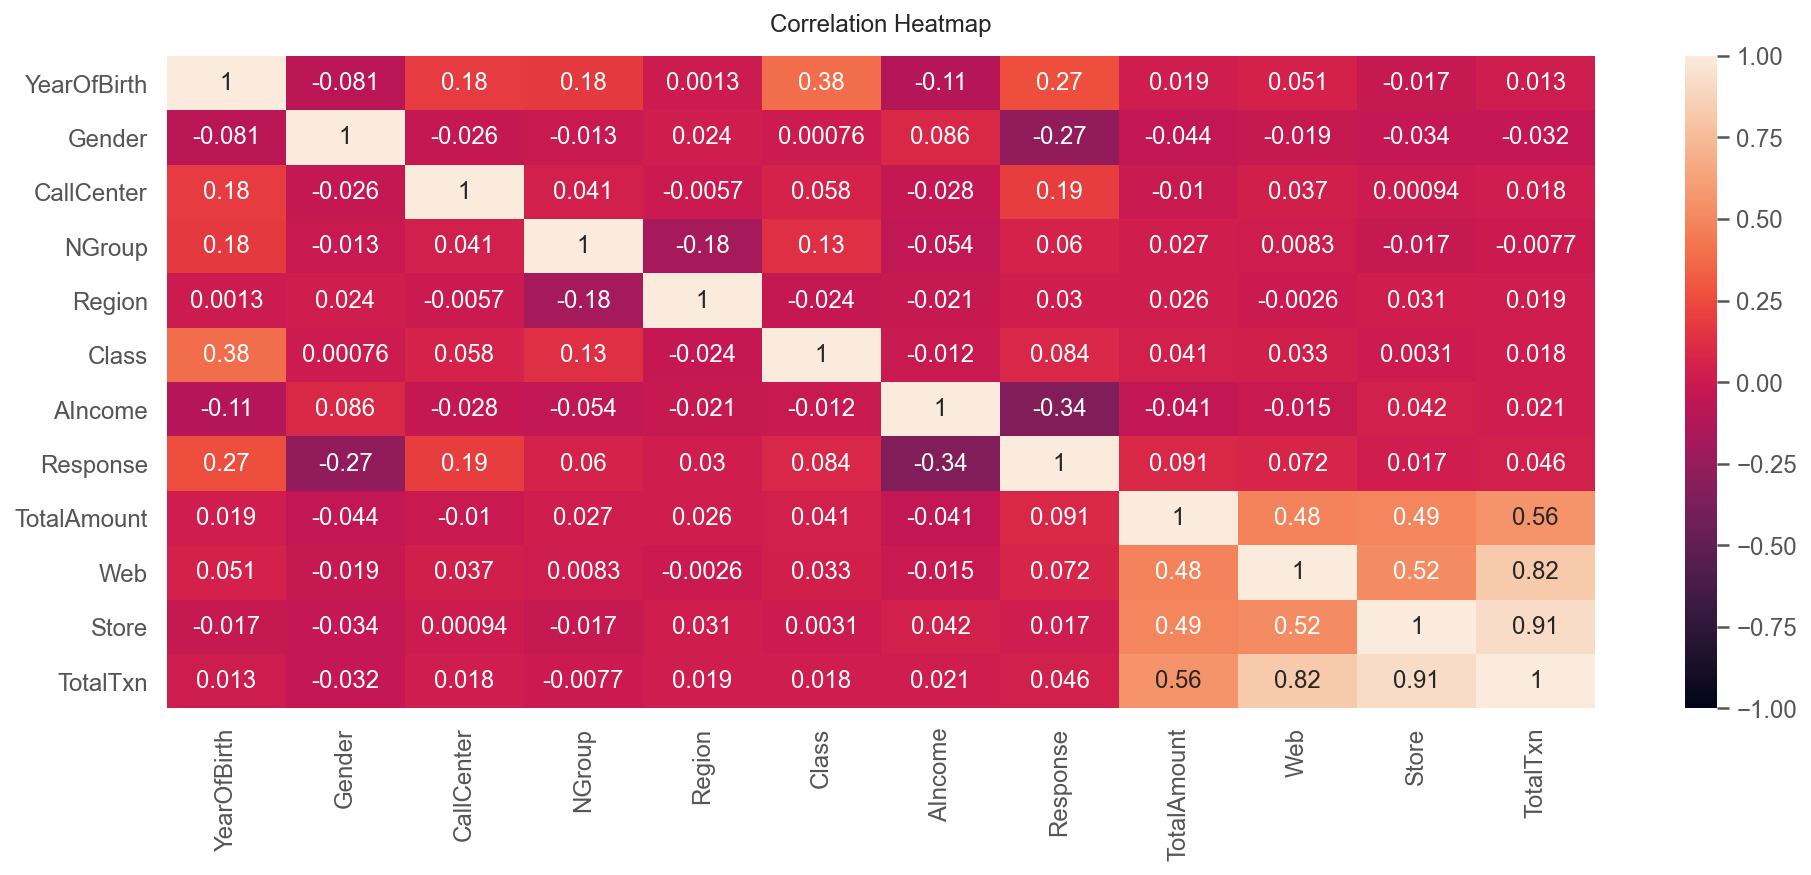

In [70]:

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [71]:
df = df.drop(columns = ['LatestTxn', 'LDate'])

Groups 7 and 1 will be merged into 1 group, named 'Other' (numerical 8), as they make up for less than 10% of the distribution

In [72]:
#Grouping less frequent Ngroups into 8 (Other)
df['NGroup']=np.where(df['NGroup'] == 7, 8, df['NGroup'])
df['NGroup']=np.where(df['NGroup'] == 1, 8, df['NGroup'])


In [73]:
df['NGroup'].unique()

array([4., 6., 2., 3., 8., 5.])

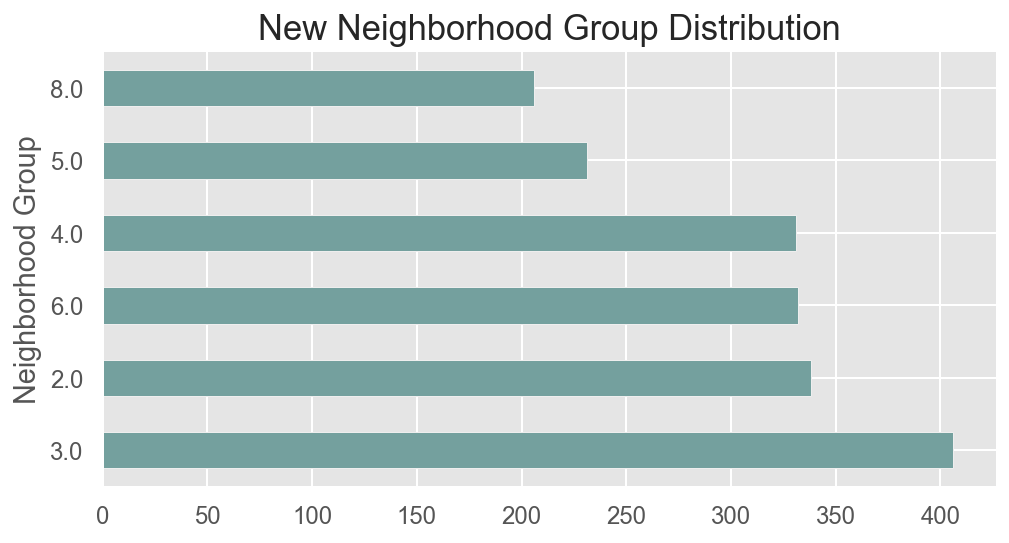

In [74]:
ax = df.NGroup.value_counts().plot.barh()

ax.set(title='New Neighborhood Group Distribution',
       ylabel='Neighborhood Group')

plt.show();

Examining the number of customers who used the voucher

In [75]:
df['Response'].value_counts()

0.0    1395
1.0     449
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

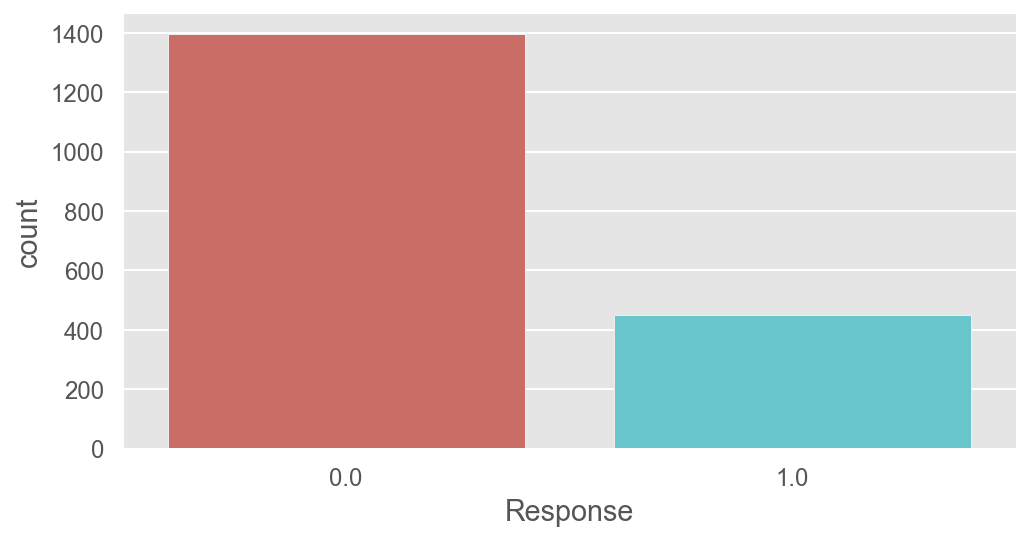

In [76]:
sns.countplot(x = 'Response', data = df, palette = 'hls')
plt.show()

In [77]:
count_no_sub = len(df[df['Response']==0])
count_sub = len(df[df['Response']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of unused vouchers is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of used vouchers is", pct_of_sub*100)

percentage of unused vouchers is 75.65075921908894
percentage of used vouchers is 24.349240780911064


In [78]:
df.groupby('Response').mean()

,YearOfBirth,Gender,CallCenter,NGroup,Region,Class,AIncome,TotalAmount,Web,Store,TotalTxn
Response,,,,,,,,,,,
0.0,1964.378495,1.797849,0.091756,4.313262,2.620072,2.866667,44.683154,176.846882,1.058781,1.973477,3.032258
1.0,1972.463252,1.298441,0.240535,4.445434,2.712695,3.035635,39.140312,306.762717,1.438753,2.102450,3.541203


Splitting the data into training and testing while keeping a balanced sample. This is done by using SMOTE

In [79]:
X = df.loc[:, df.columns != 'Response']
X.isna().sum()

CustID         0
YearOfBirth    0
Gender         0
CallCenter     0
NGroup         0
Region         0
Class          0
AIncome        0
TotalAmount    0
Web            0
Store          0
TotalTxn       0
dtype: int64

In [81]:
X = df.loc[:, df.columns != 'Response']
y = df.loc[:, df.columns == 'Response']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Response'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of unused voucher in oversampled data",len(os_data_y[os_data_y['Response']==0]))
print("Number of used vouchers",len(os_data_y[os_data_y['Response']==1]))
print("Proportion of unused voucher data in oversampled data is ",len(os_data_y[os_data_y['Response']==0])/len(os_data_X))
print("Proportion of used voucher data in oversampled data is ",len(os_data_y[os_data_y['Response']==1])/len(os_data_X))

length of oversampled data is  1942
Number of unused voucher in oversampled data 971
Number of used vouchers 971
Proportion of unused voucher data in oversampled data is  0.5
Proportion of used voucher data in oversampled data is  0.5


Recursive Feature Elimination

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

Optimal number of features: 4
Selected features: ['YearOfBirth', 'Gender', 'AIncome', 'TotalAmount']


<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (nb of correct classifications)')

/Users/trajche/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


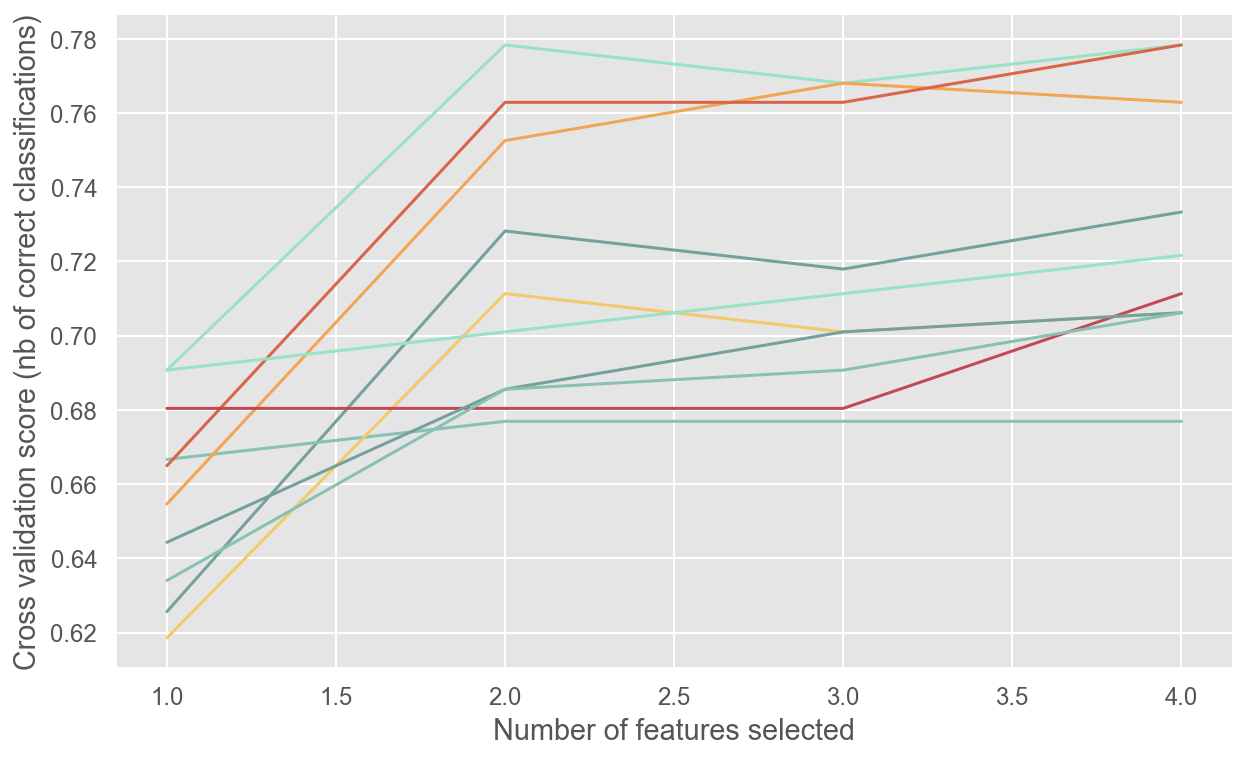

In [95]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [85]:
data_final_vars

['CustID',
 'YearOfBirth',
 'Gender',
 'CallCenter',
 'NGroup',
 'Region',
 'Class',
 'AIncome',
 'Response',
 'TotalAmount',
 'Web',
 'Store',
 'TotalTxn']

In [86]:
cols=['CustID', 'YearOfBirth', 'Gender', 'AIncome','TotalTxn', 'TotalAmount'] 
X=os_data_X[cols]
y=os_data_y['Response']

Implementing the Model

In [88]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.532229
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.232      
Dependent Variable: Response         AIC:              2079.1774  
Date:               2022-07-30 12:39 BIC:              2112.6063  
No. Observations:   1942             Log-Likelihood:   -1033.6    
Df Model:           5                LL-Null:          -1346.1    
Df Residuals:       1936             LLR p-value:      7.9863e-133
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
CustID        -0.0000    0.0000   -0.4049  0.6856  -0.0000   0.0000
YearOfBirth    0.0039    0.0002   17.8556  0.0000

CustomerID and TotalTxn have p values > 0.05
We will remove them

In [89]:
cols=['YearOfBirth', 'Gender', 'AIncome','TotalAmount'] 
X=os_data_X[cols]
y=os_data_y['Response']

import statsmodels.api as sm
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.533116
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.231      
Dependent Variable: Response         AIC:              2078.6232  
Date:               2022-07-30 12:42 BIC:              2100.9091  
No. Observations:   1942             Log-Likelihood:   -1035.3    
Df Model:           3                LL-Null:          -1346.1    
Df Residuals:       1938             LLR p-value:      2.1342e-134
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
YearOfBirth    0.0039    0.0002   18.2486  0.0000   0.0034   0.0043
Gender        -1.0309    0.0804  -12.8230  0.0000

Logistic Regression Model Fitting

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[224  71]
 [ 69 219]]


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       295
         1.0       0.76      0.76      0.76       288

    accuracy                           0.76       583
   macro avg       0.76      0.76      0.76       583
weighted avg       0.76      0.76      0.76       583



<Figure size 576x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

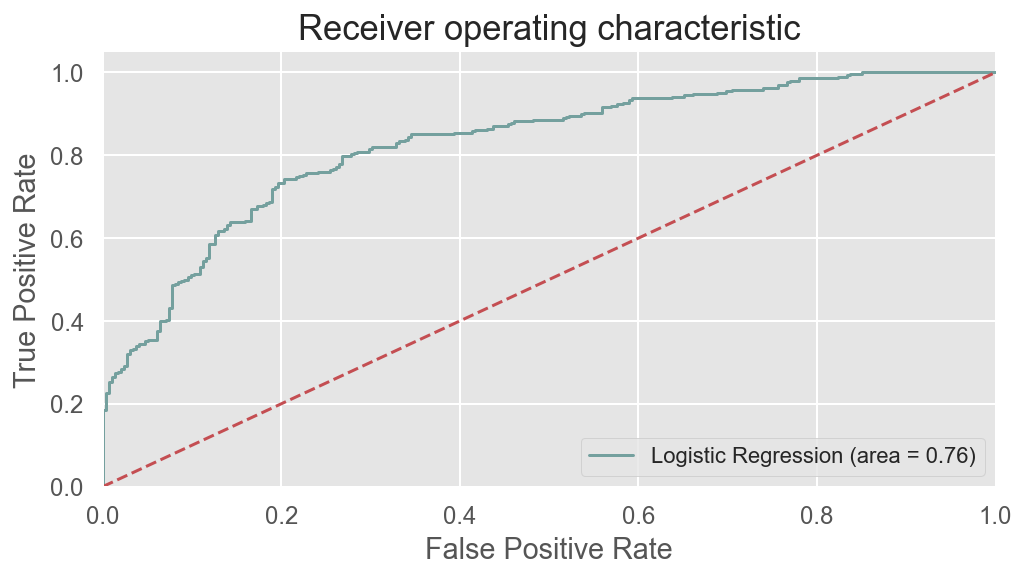

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()